# Project Description: 
The following project aims to predict class using various technical specifications (features) as input to the logistic regression algorithms. 

# Importing the required libraries

In [2]:
!pip install xgboost

You should consider upgrading via the 'c:\users\admin\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Loading Data and Dataset Understanding

In [4]:
data=pd.read_csv(r'C:\Users\Admin\Desktop\Ionosphere.csv')
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1


In [5]:
data.ndim         #dimension of dataset

2

In [6]:
data.columns #columns of dataset

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'Class'],
      dtype='object')

In [7]:
data.dtypes   #datatype of dataset

V1         int64
V2         int64
V3       float64
V4       float64
V5       float64
V6       float64
V7       float64
V8       float64
V9       float64
V10      float64
V11      float64
V12      float64
V13      float64
V14      float64
V15      float64
V16      float64
V17      float64
V18      float64
V19      float64
V20      float64
V21      float64
V22      float64
V23      float64
V24      float64
V25      float64
V26      float64
V27      float64
V28      float64
V29      float64
V30      float64
V31      float64
V32      float64
V33      float64
V34      float64
Class      int64
dtype: object

In [8]:
data['V2'].value_counts()

0    351
Name: V2, dtype: int64

In [9]:
data['V1'].value_counts()

1    313
0     38
Name: V1, dtype: int64

In [10]:
data.drop('V2',axis=1,inplace=True)

In [11]:
data.shape   #shape of dataset

(351, 34)

In [12]:
data.info()        #basic information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      351 non-null    int64  
 1   V3      351 non-null    float64
 2   V4      351 non-null    float64
 3   V5      351 non-null    float64
 4   V6      351 non-null    float64
 5   V7      351 non-null    float64
 6   V8      351 non-null    float64
 7   V9      351 non-null    float64
 8   V10     351 non-null    float64
 9   V11     351 non-null    float64
 10  V12     351 non-null    float64
 11  V13     351 non-null    float64
 12  V14     351 non-null    float64
 13  V15     351 non-null    float64
 14  V16     351 non-null    float64
 15  V17     351 non-null    float64
 16  V18     351 non-null    float64
 17  V19     351 non-null    float64
 18  V20     351 non-null    float64
 19  V21     351 non-null    float64
 20  V22     351 non-null    float64
 21  V23     351 non-null    float64
 22  V2

In [13]:
data.describe() # Statisctics information of dataset

,V1,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,0.476183,...,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480,0.641026
std,0.311155,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,0.563496,...,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337,0.480384
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,1.000000,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,0.021120,...,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350,0.000000
50%,1.000000,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,0.667980,...,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000,1.000000
75%,1.000000,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,0.957895,...,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
data.isna().sum()         #Checking for missing values

V1       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
V17      0
V18      0
V19      0
V20      0
V21      0
V22      0
V23      0
V24      0
V25      0
V26      0
V27      0
V28      0
V29      0
V30      0
V31      0
V32      0
V33      0
V34      0
Class    0
dtype: int64

In [15]:
data.corr()         #correlation of dataset

,V1,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
V1,1.000000,0.302034,-0.006529,0.156152,0.127606,0.221867,0.027079,0.189242,-0.051883,0.034138,...,0.149789,-0.203100,-0.010725,0.133632,-0.121415,0.167031,-0.100914,0.162962,0.010788,0.465614
V3,0.302034,1.000000,0.143365,0.476587,0.025768,0.440254,0.008717,0.471614,0.047916,0.325016,...,-0.073202,0.077911,0.123345,0.344459,0.057890,0.246653,-0.009332,0.263343,0.000584,0.519145
V4,-0.006529,0.143365,1.000000,0.001152,-0.190308,-0.054030,0.255003,-0.302317,0.207697,-0.190090,...,-0.236987,-0.046910,0.000743,-0.041090,0.342301,-0.172276,-0.122788,-0.153964,0.034608,0.125884
V5,0.156152,0.476587,0.001152,1.000000,0.038323,0.597075,-0.029794,0.450454,-0.034236,0.449829,...,-0.032254,0.140899,0.184517,0.257646,0.051068,0.399840,0.025681,0.383467,-0.099478,0.516477
V6,0.127606,0.025768,-0.190308,0.038323,1.000000,-0.010227,0.274747,-0.120712,0.200080,-0.291447,...,0.041787,-0.175433,-0.068775,-0.029392,-0.158090,-0.100240,0.316802,0.016899,0.185215,0.149099
V7,0.221867,0.440254,-0.054030,0.597075,-0.010227,1.000000,-0.150424,0.461889,-0.090268,0.412876,...,0.087734,0.097566,0.109391,0.300632,-0.015158,0.415216,-0.008323,0.545881,-0.076460,0.450429
V8,0.027079,0.008717,0.255003,-0.029794,0.274747,-0.150424,1.000000,-0.336013,0.373567,-0.364003,...,-0.133023,-0.254130,0.072373,-0.139725,0.078585,-0.166682,0.152381,-0.200860,0.360610,0.207544
V9,0.189242,0.471614,-0.302317,0.450454,-0.120712,0.461889,-0.336013,1.000000,-0.251950,0.670813,...,0.107478,0.172210,0.146817,0.329813,-0.031983,0.316021,-0.067499,0.344814,-0.095597,0.294852
V10,-0.051883,0.047916,0.207697,-0.034236,0.200080,-0.090268,0.373567,-0.251950,1.000000,-0.337374,...,-0.043680,-0.250947,0.072018,-0.123296,-0.008578,-0.155661,-0.015640,-0.203629,0.098104,0.120634
V11,0.034138,0.325016,-0.190090,0.449829,-0.291447,0.412876,-0.364003,0.670813,-0.337374,1.000000,...,0.131849,0.292281,0.197369,0.396851,0.074600,0.294646,0.023922,0.339506,-0.152225,0.167908


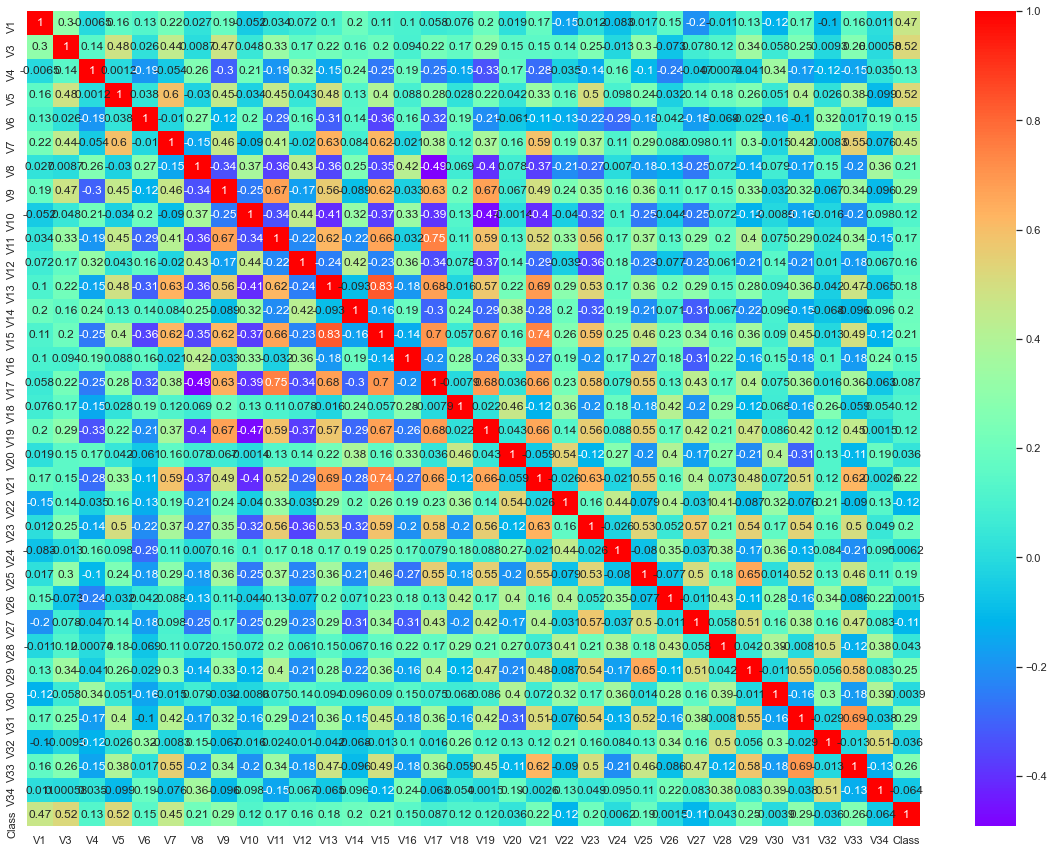

In [16]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),cmap='rainbow',annot=True);

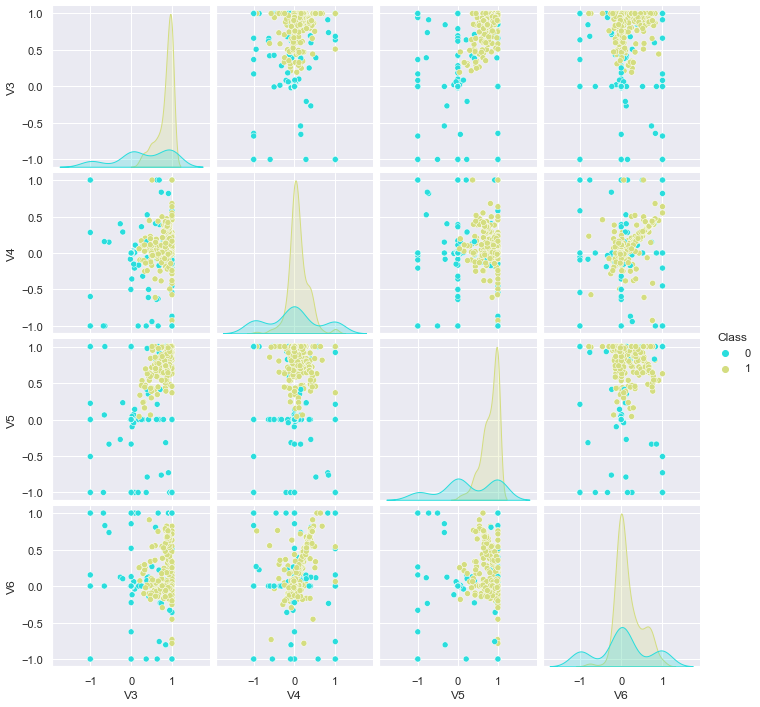

In [17]:
sns.pairplot(data[['V3','V4','V5','V6','Class']],hue='Class',palette='rainbow');

In [18]:
import scikitplot as skplt
import warnings
import missingno as msno
from pingouin import plot_blandaltman
warnings.filterwarnings('ignore')

# Visualization of missing values

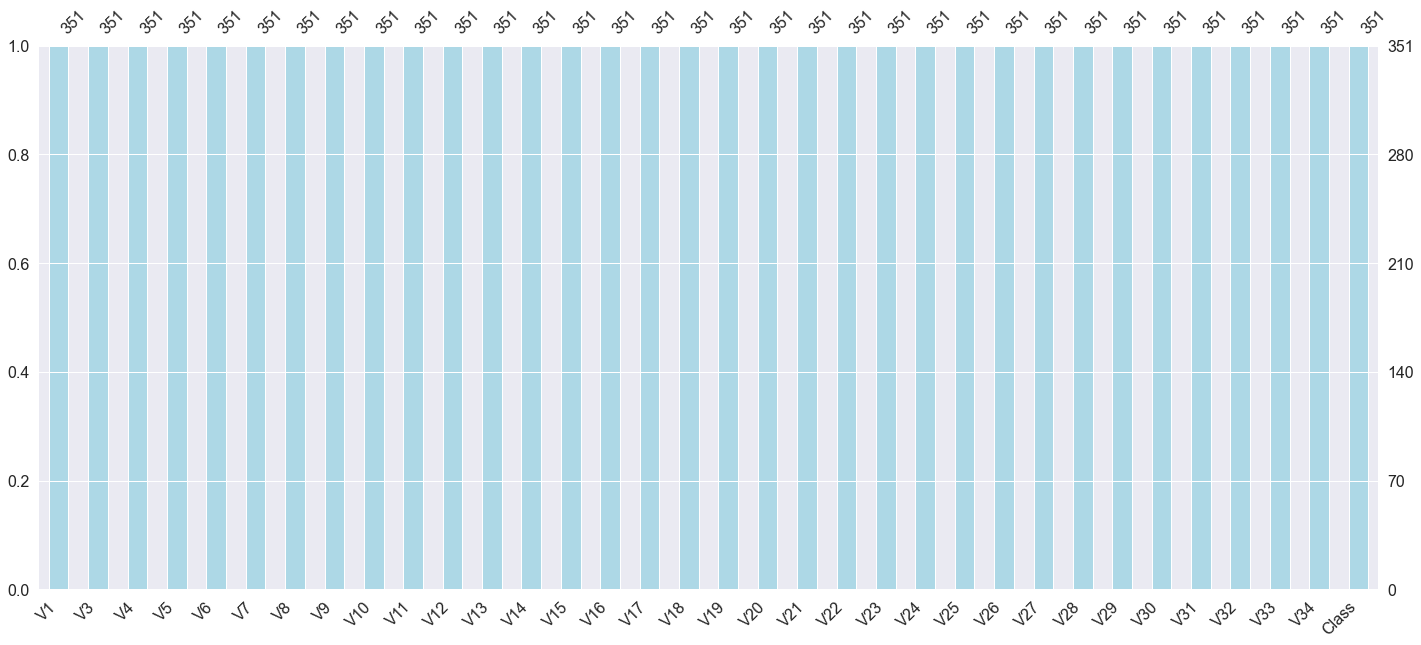

In [19]:
msno.bar(data,color='lightblue')
plt.show()

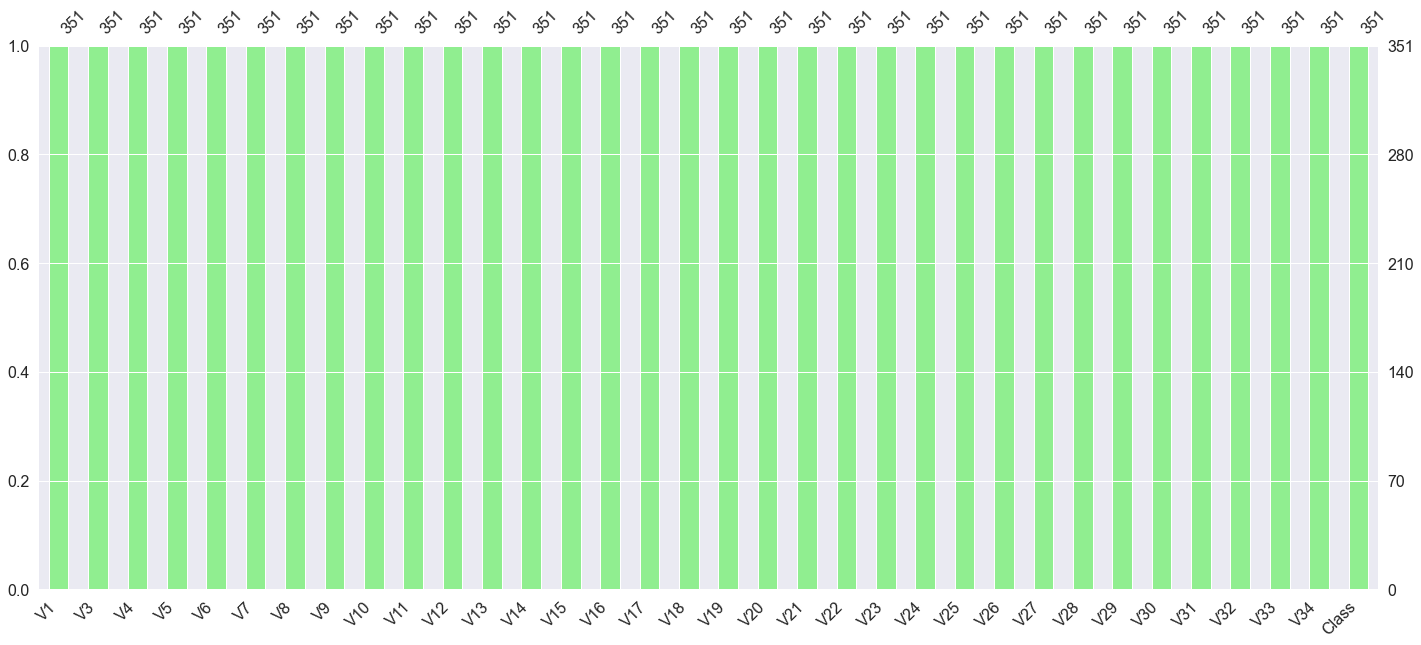

In [20]:
msno.bar(data,color='lightgreen')
plt.show()

# Data Visualization:-

In [21]:
def plot_numerical(var):
    fig, axes = plt.subplots(2,2,figsize=(14,10))
    sns.histplot(x = data[var], ax = axes[0][0],kde = True,bins=20)
    qqplot(data[var], dist='norm',ax = axes[0][1])
    sns.stripplot(x = data.V23,y = data[var], ax = axes[1][0],palette = 'bright')
    sns.barplot(x = data.V20,y = data[var], ax = axes[1][1],palette = 'bright')
    plt.suptitle(var.title())
    plt.show()

In [22]:
numerical_columns = ['V23','V20','V19','V18','V17','V15','V14','V16','V21','V22','V24']

In [24]:
from pingouin import qqplot

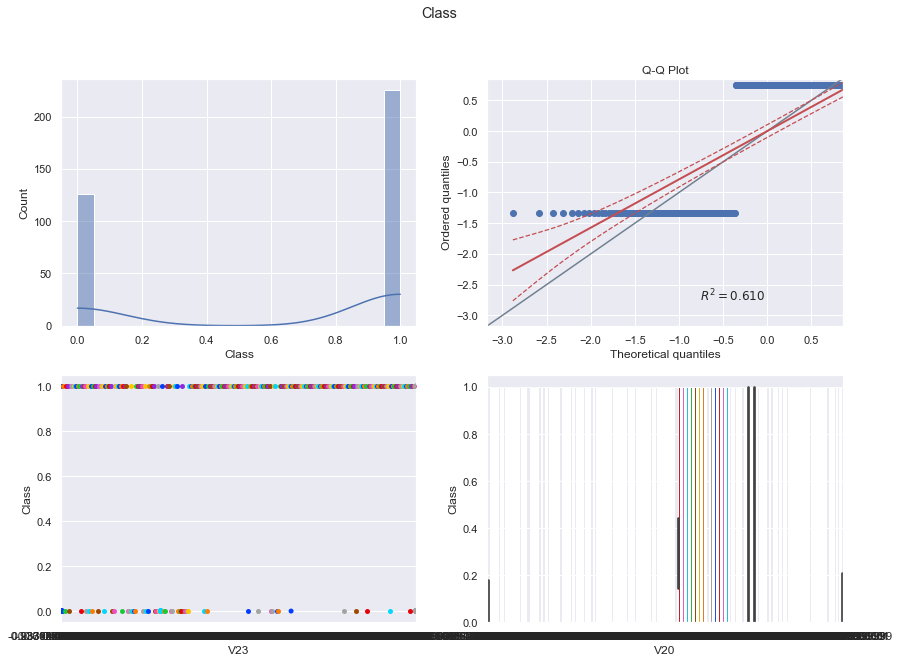

In [26]:
plot_numerical(numerical_columns[0])

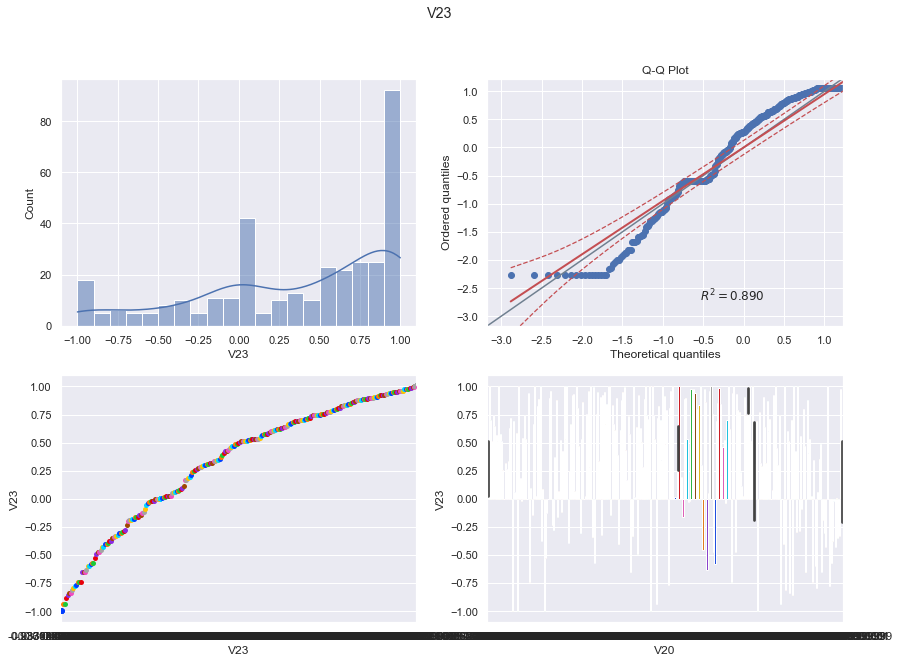

In [27]:
plot_numerical(numerical_columns[1])

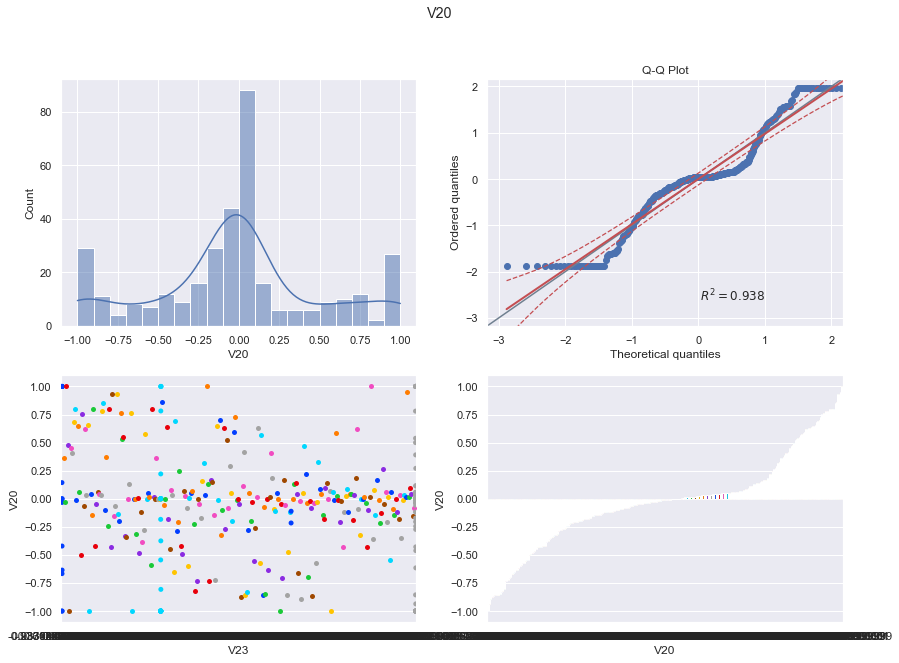

In [28]:
plot_numerical(numerical_columns[2])

# Data Splitting

In [32]:
X= data.drop('Class',axis=1)
y= data['Class']

In [33]:
X[:5]

,V1,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34
0,1,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697


In [34]:
y[:5]

0    1
1    0
2    1
3    0
4    1
Name: Class, dtype: int64

# Modelling Dataset:-

In [35]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=25,stratify=y)

In [36]:
models={'LogisticRegression':LogisticRegression(),
        'DecisionTree': DecisionTreeClassifier(),
        'Random_foresest': RandomForestClassifier(),
        'K-Nearest': KNeighborsClassifier(n_neighbors=3),
        'Gaussian': GaussianNB(),
        'SVM': SVC(),
        'Xgboost': XGBClassifier(),
        'Adaboost': AdaBoostClassifier()}

In [37]:
model_test_score={}
model_train_score={}

for name,model in models.items():
    model.fit(X_train,y_train)
    model_test_score[name]=model.score(X_test,y_test)
    model_train_score[name]=model.score(X_train,y_train)

[12:54:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [38]:
df= pd.DataFrame(model_test_score,index=['Test_accuracy'])
df=df.transpose()

In [39]:
df['Train_accuracy']=model_train_score.values()
df['Difference']= (df['Train_accuracy']-df['Test_accuracy'])
df

,Test_accuracy,Train_accuracy,Difference
LogisticRegression,0.915493,0.910714,-0.004779
DecisionTree,0.901408,1.000000,0.098592
Random_foresest,0.957746,1.000000,0.042254
K-Nearest,0.901408,0.900000,-0.001408
Gaussian,0.915493,0.885714,-0.029779
SVM,0.971831,0.957143,-0.014688
Xgboost,0.943662,1.000000,0.056338
Adaboost,0.915493,1.000000,0.084507


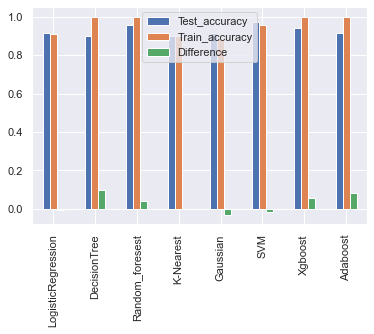

In [40]:
df.plot.bar();

# using Cross_validation for Logistic Regression 

In [41]:
lr= LogisticRegression()

In [42]:
# using Accuracy metric
cv_acc= cross_val_score(lr,X,y,cv=10,scoring='accuracy')

In [43]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8576190476190476

In [44]:
# using Precision
cv_pre= cross_val_score(lr,X,y,scoring='precision')
cv_pre= np.mean(cv_pre)
cv_pre

0.8342638915595678

In [45]:
# using Recall
cv_recall= cross_val_score(lr,X,y,scoring='recall')
cv_recall=np.mean(cv_recall)
cv_recall

0.9644444444444444

In [46]:
#using F1 score
cv_f1= cross_val_score(lr,X,y,scoring='f1')
cv_f1=np.mean(cv_f1)
cv_f1

0.8938360872467015

In [47]:
cv_metric= {'Accuracy': cv_acc,
           'Precision': cv_pre,
           'Recall': cv_recall,
           'F1': cv_f1}

cv_metric

{'Accuracy': 0.8576190476190476,
 'Precision': 0.8342638915595678,
 'Recall': 0.9644444444444444,
 'F1': 0.8938360872467015}

In [48]:
df_2= pd.DataFrame(cv_metric,index=['Result'])
df_2=df_2.T

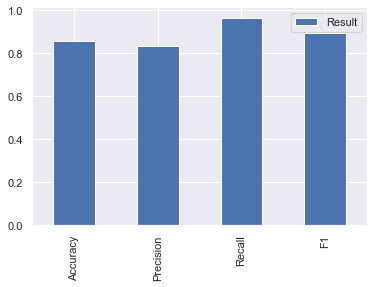

In [49]:
df_2.plot.bar();

# ploting Roc And Auc Curve

In [50]:
lr= LogisticRegression().fit(X_train,y_train)

In [51]:
y_pred= lr.predict(X_test)
y_prob= lr.predict_proba(X_test)

In [52]:
y_prob

array([[0.06866497, 0.93133503],
       [0.12587773, 0.87412227],
       [0.27656348, 0.72343652],
       [0.90765418, 0.09234582],
       [0.06450363, 0.93549637],
       [0.13744668, 0.86255332],
       [0.9874243 , 0.0125757 ],
       [0.07325069, 0.92674931],
       [0.13010147, 0.86989853],
       [0.08743505, 0.91256495],
       [0.29532608, 0.70467392],
       [0.19214887, 0.80785113],
       [0.14402611, 0.85597389],
       [0.20985301, 0.79014699],
       [0.03250934, 0.96749066],
       [0.9385361 , 0.0614639 ],
       [0.03577742, 0.96422258],
       [0.97241208, 0.02758792],
       [0.09549212, 0.90450788],
       [0.99239661, 0.00760339],
       [0.97136151, 0.02863849],
       [0.09911043, 0.90088957],
       [0.11040152, 0.88959848],
       [0.09329092, 0.90670908],
       [0.08832237, 0.91167763],
       [0.38597248, 0.61402752],
       [0.96679444, 0.03320556],
       [0.8985081 , 0.1014919 ],
       [0.06158084, 0.93841916],
       [0.95933729, 0.04066271],
       [0.

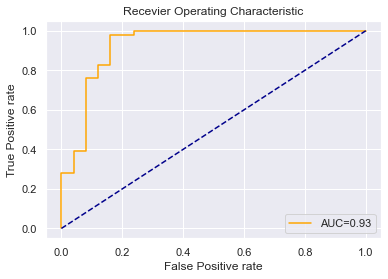

In [53]:
positive_prob=y_prob[:,1]
fpr,tpr,threshold= roc_curve(y_test,positive_prob)
roc_auc= auc(fpr,tpr)
plt.title('Recevier Operating Characteristic')
plt.plot(fpr,tpr,'orange',label='AUC=%0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate');

In [54]:
print(roc_auc)

0.928695652173913


In [55]:
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[21  4]
 [ 2 44]]


              precision    recall  f1-score   support

           0       0.91      0.84      0.87        25
           1       0.92      0.96      0.94        46

    accuracy                           0.92        71
   macro avg       0.91      0.90      0.91        71
weighted avg       0.92      0.92      0.91        71



In [56]:
pred_data= pd.DataFrame()
pred_data['Y_true']= y_test.values
pred_data['Y_pred']= y_pred

# ROC Curve

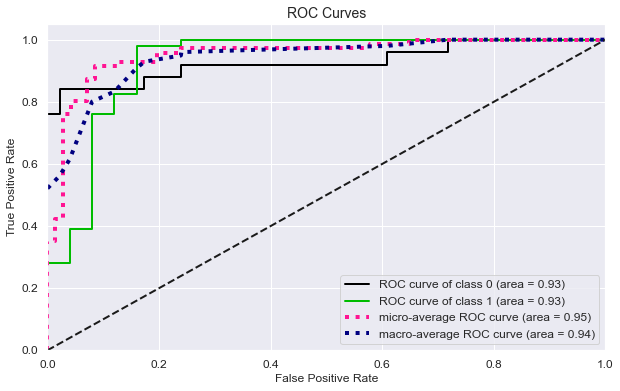

In [60]:
y_prob= lr.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_prob,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

# Precision Recall Curve

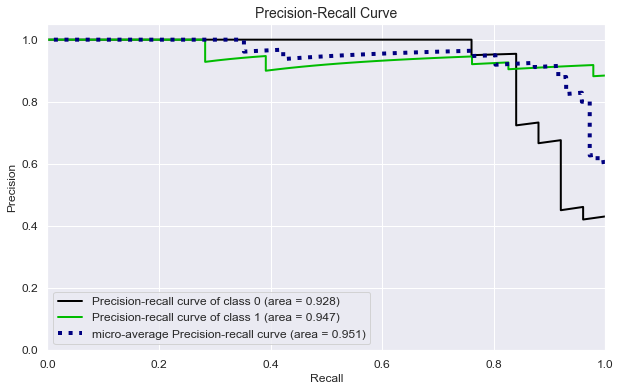

In [61]:
skplt.metrics.plot_precision_recall(y_test, y_prob,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

# Learning Curve

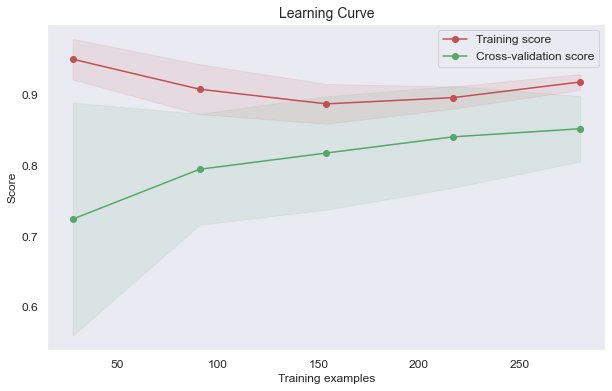

In [63]:
skplt.estimators.plot_learning_curve(lr, X, y,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

# Lift Curve

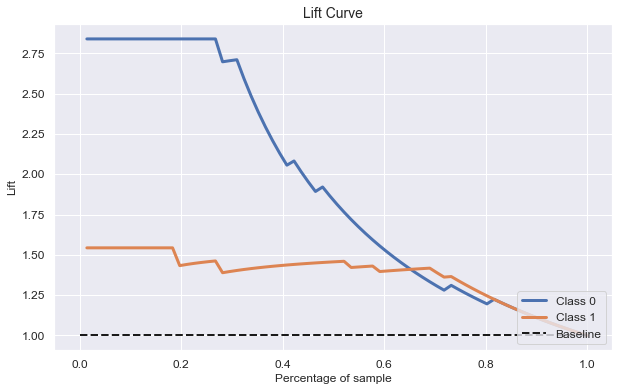

In [64]:
skplt.metrics.plot_lift_curve(y_test, y_prob,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

# Cumulative Gains Curve

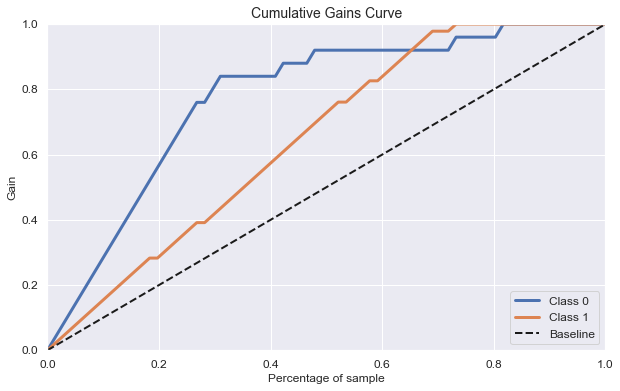

In [65]:
skplt.metrics.plot_cumulative_gain(y_test, y_prob,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

# Conclusion:- 
The given dataset have target varibale and it is a type of binary class (0,1) its a Supervised machine learning task,after performing varius supervised machine learning models, i found Logistic Regression is most suitable model. hence Logistic Regression is implimented the Area under the curve is given by this model is 93%.

# THANK YOU